In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 25
learning_rate = 0.1 # Will not converge with learning rate at 0.4
iterations = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [5]:
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))
opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = opt_l1.minimize(loss_l1)
init = tf.global_variables_initializer()
sess.run(init)
loss_vec_l1 = []

for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i+1) % 25 == 0:
        print('Step #{}: A={}, b={}'.format(str(i+1), str(sess.run(A)), str(sess.run(b))))

Step #25: A=[[3.0502138]], b=[[1.6569705]]
Step #50: A=[[2.516214]], b=[[2.3569703]]


In [6]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [7]:
sess = tf.Session()

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare loss functions
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))

# Declare optimizers
my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l2 = my_opt_l2.minimize(loss_l2)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

loss_vec_l2 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l2.append(temp_loss_l2)
    if (i+1)%25==0:
        print('Step #{}: A={}, b={}'.format(str(i+1), str(sess.run(A)), str(sess.run(b))))

Step #25: A=[[1.6162914]], b=[[3.7491248]]
Step #50: A=[[1.1420845]], b=[[4.4202266]]


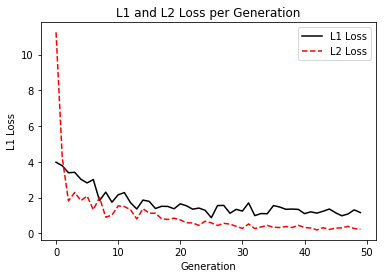

In [8]:
# Plot loss over time
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()